In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report


In [126]:
%matplotlib inline 

In [76]:
from sklearn.svm import SVC

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
car_data=pd.read_csv('data/car-knn.csv', encoding='utf-8')

In [28]:
car_data

,wheels,chassis,pax,vtype,class
0,1,1,1,Bike,1
1,1,1,1,Bike,1
2,1,1,1,Bike,1
3,1,1,1,Bike,1
4,1,1,1,Bike,1
...,...,...,...,...,...
99995,18,27,1,Truck,4
99996,18,21,1,Truck,4
99997,18,23,1,Truck,4
99998,18,28,1,Truck,4


In [12]:
car_data.groupby('vtype').size() # 타입 별 개수

vtype
Bike     24894
Bus      24975
Car      25029
Truck    25102
dtype: int64

In [11]:
car_data.groupby('class').size() # 클래스 별 개수

class
1    24894
2    25029
3    24975
4    25102
dtype: int64

In [19]:
car_data2=car_data.drop('vtype',axis=1)

# 타입 별 개수 그래프


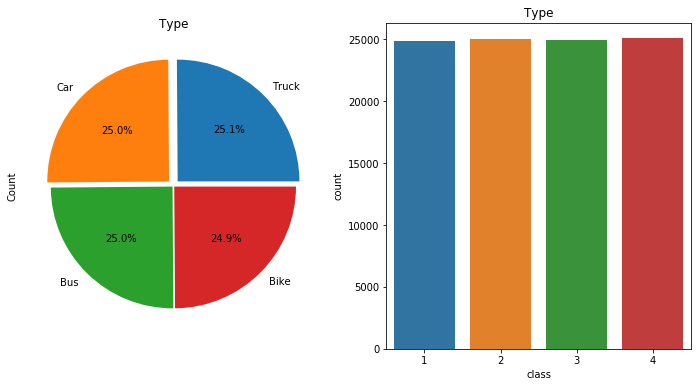

In [96]:
f,ax=plt.subplots(1,2,figsize=(12,6))

car_data['vtype'].value_counts().plot.pie(ax=ax[0],explode=(0.05, 0.05, 0.01, 0.01),autopct='%1.1f%%')
ax[0].set_title('Type')
ax[0].set_ylabel('Count')

sns.countplot('class', data=car_data,ax=ax[1])
ax[1].set_title('Type')
plt.show()

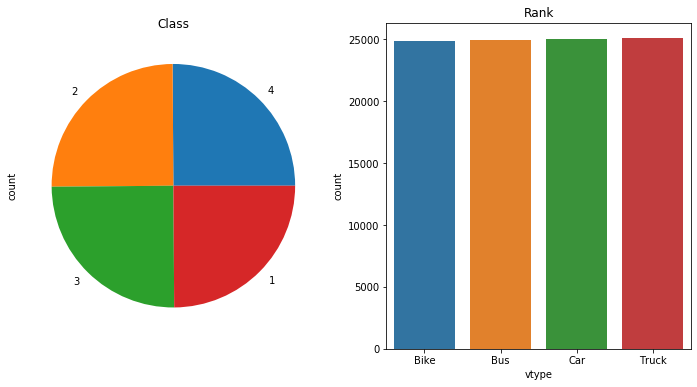

In [128]:
f,ax=plt.subplots(1,2,figsize=(12,6))

car_data['class'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Class')
ax[0].set_ylabel('count')

sns.countplot('vtype', data=car_data,ax=ax[1])
ax[1].set_title('Rank')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


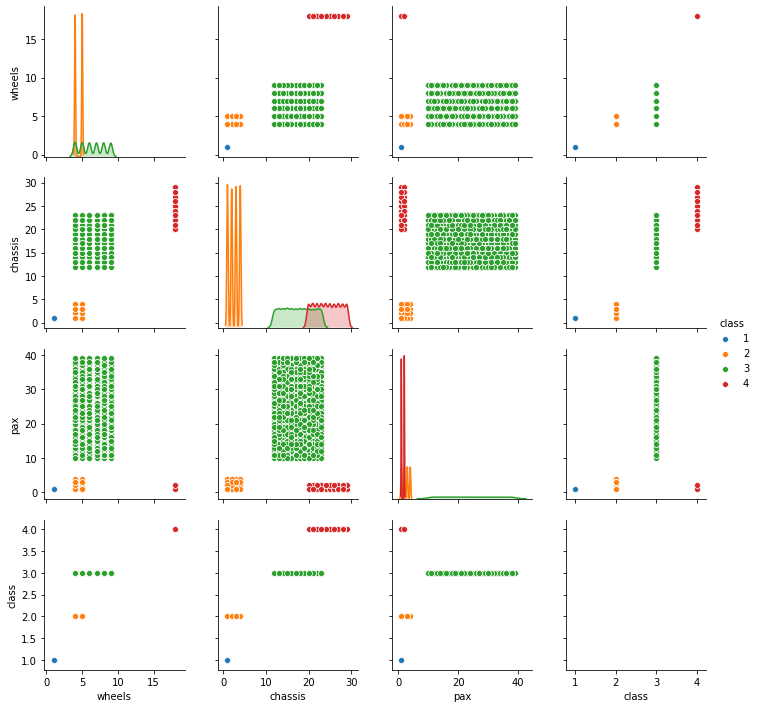

In [129]:
sns.pairplot(car_data2, hue='class') # 항목별 그래프

## HeatMap

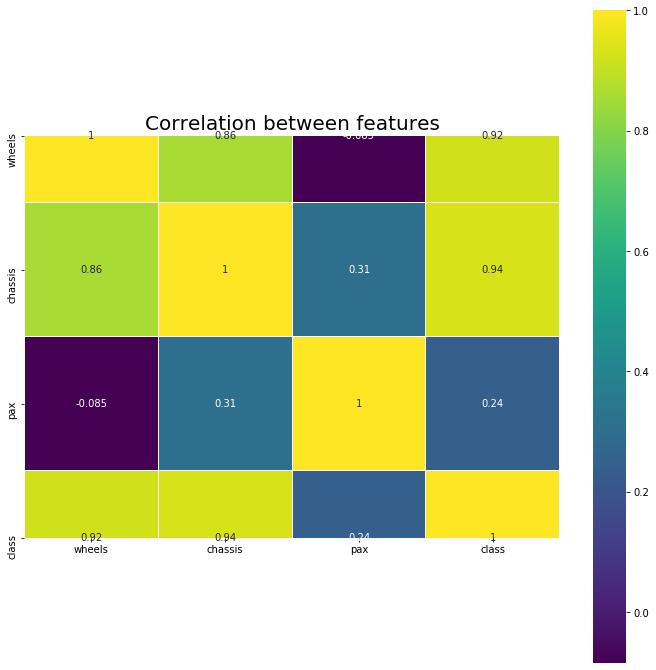

In [140]:
plt.figure(figsize=(12, 12))
sns.heatmap(car_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features', fontsize=20)
plt.show()

In [131]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
wheels     100000 non-null int64
chassis    100000 non-null int64
pax        100000 non-null int64
vtype      100000 non-null object
class      100000 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [30]:
y = car_data.loc[:,'class'] # 타입을 1,2,3,4로 표시된 컬럼 답
x = car_data.loc[:,['wheels','chassis','pax']]

In [70]:
# x 일 때 y가 나온다. 트레이닝 데이터80% 테스드 데이터 20% 설정 할 때 마다 값 섞는다.
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, train_size=0.8, shuffle=True) 

In [71]:
knn = KNeighborsClassifier(n_neighbors=3) # 그 값의 주변 데이터 3개씩 찾기

In [72]:
knn.fit(x_train,y_train) # 트레이닝 시작

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
y_pred= knn.predict(x_test) # 데스트 값의 답

In [74]:
print("정답률 >>" , accuracy_score(y_test, y_pred)) # 테스트 데이터 와 답을 비교하여 정답률 측정

정답률 >> 1.0


In [75]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00      4930\n           2       1.00      1.00      1.00      4985\n           3       1.00      1.00      1.00      5015\n           4       1.00      1.00      1.00      5070\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n'

In [107]:
from sklearn.tree import export_graphviz
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [114]:
car_clf=DecisionTreeClassifier(max_depth=8, random_state=20)
car_clf.fit(car_data[['wheels','chassis','pax']], car_data['class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')

In [118]:
export_graphviz(
    car_clf,
    out_file='car_tree.dot',
    feature_names=['wheels','chassis','pax'],
    class_names=car_data['vtype'],
    rounded=True,
    filled=True
)

In [116]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
wheels     100000 non-null int64
chassis    100000 non-null int64
pax        100000 non-null int64
vtype      100000 non-null object
class      100000 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [119]:
with open('car_tree.dot') as f:
    dot_graph=f.read()
    dot = graphviz.Source(dot_graph)
dot.format ='png'
dot.render(filename='car_tree', directory='images/tree', cleanup=True)

'images/tree\\car_tree.png'

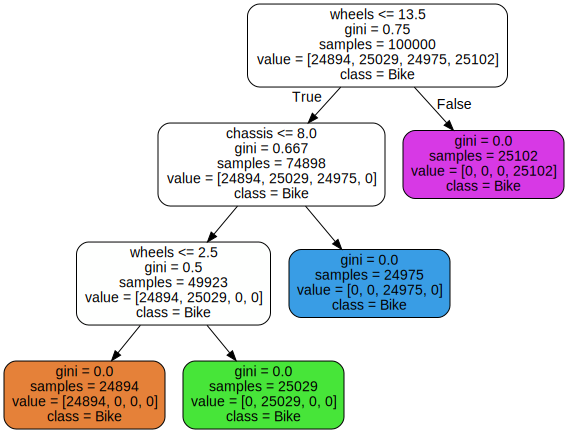

In [120]:
dot